In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
N = 443
train = pd.read_csv("input.txt", sep="\t")

In [3]:
train.head()

,yyyy,month,tmax,tmin
0,1908,January,5.0,-1.4
1,1908,February,7.3,1.9
2,1908,March,6.2,0.3
3,1908,April,Missing_1,2.1
4,1908,May,Missing_2,7.7


In [4]:
for i in range(10):
    if(train.tmax[i].__contains__("Missing")):
        print("yes ", i)

yes  3
yes  4
yes  6


In [80]:
train["tmax"] = pd.to_numeric(train["tmax"], errors='coerce')

In [133]:
# at what index do we need to predict=
tmin_miss = train["tmax"].isna()
tmax_miss = train["tmin"].isna()

In [172]:
train.loc[tmin_miss].head()

,yyyy,month,tmax,tmin
3,1908,April,NaN,2.1
4,1908,May,NaN,7.7
6,1908,July,NaN,11.0
25,1910,February,NaN,1.5
48,1912,January,NaN,0.1


In [173]:
train.loc[~tmin_miss].head()

,yyyy,month,tmax,tmin
0,1908,January,5.0,-1.4
1,1908,February,7.3,1.9
2,1908,March,6.2,0.3
5,1908,June,17.7,8.7
7,1908,August,17.5,9.7


In [83]:
X1_train = np.array(train[~tmin_miss].index)
X1_train = X1_train.reshape(X1_train.shape[0],1)
y1_train = np.array(train.tmin[~tmin_miss],dtype="float")

X1_test = np.array(train[tmin_miss].index)
X1_test = X1_test.reshape(X1_test.shape[0],1)
y1_test = np.array(train.tmin[tmin_miss],dtype="float")

In [86]:
X2_train = np.array(train[~tmax_miss].index)
X2_train = X2_train.reshape(X2_train.shape[0],1)
y2_train = np.array(train.tmax[~tmax_miss],dtype="float")

X2_test = np.array(train[tmin_miss].index)
X2_test = X2_test.reshape(X2_test.shape[0],1)
y2_test = np.array(train.tmin[tmin_miss],dtype="float")

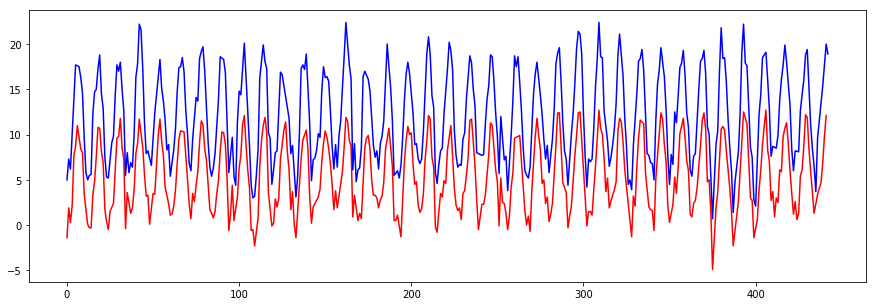

In [87]:
plt.figure(figsize=[15,5])
plt.plot(X1_train,y1_train,'r-')
plt.plot(X2_train,y2_train,'b-')

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [111]:
model_min = RandomForestRegressor(random_state=0)
model_max = RandomForestRegressor(random_state=0)

In [112]:
model_min.fit(X1_train,y1_train)
model_max.fit(X2_train,y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [113]:
y1_pred = model_min.predict(X1_test)
y2_pred = model_max.predict(X2_test)

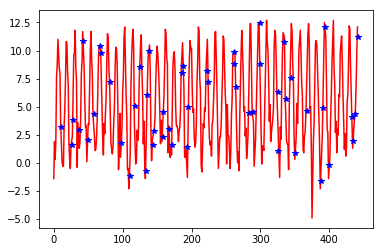

In [114]:
plt.plot(X1_train,y1_train,'r-')
plt.plot(X1_test, y1_pred, 'b*')

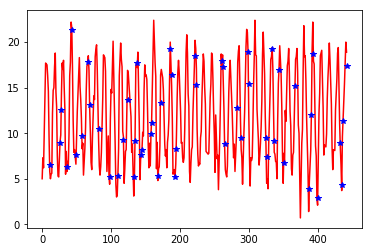

In [116]:
plt.plot(X2_train,y2_train,'r-')
plt.plot(X2_test, y2_pred, 'b*')

In [154]:
msng = list()
# find the ordering of the missing data
for i in range(train.shape[0]):
    if(np.isnan(train.tmax[i]) | np.isnan(train.tmin[i])):
        msng.append(i)

In [165]:
np.any(train.tmin[tmin_miss].index, ind)


True

In [184]:
msng_adj = [x - 1 for x in msng]

In [195]:
train.tmin[tmin_miss].index

Int64Index([  3,   4,   6,  25,  48,  50,  52,  53,  61,  74,  81,  90,  93,
             95, 102, 104, 105, 113, 123, 126, 127, 128, 132, 140, 163, 174,
            177, 185, 191, 200, 220, 233, 239, 240, 253, 257, 270, 274, 292,
            313, 322, 330, 346, 366, 376, 389, 396, 411, 424],
           dtype='int64')

In [194]:
train.tmax[tmax_miss].index

Int64Index([ 11,  26,  28,  36,  43,  49,  58,  67,  69,  82,  98, 110, 118,
            125, 134, 135, 138, 144, 145, 158, 159, 168, 172, 186, 188, 193,
            195, 222, 224, 261, 262, 265, 283, 289, 299, 300, 325, 326, 334,
            337, 344, 351, 367, 388, 391, 394, 400, 433, 435, 437, 442],
           dtype='int64')

In [217]:
np.isin(msng[3], train.tmin[tmin_miss].index)


array(False)

In [220]:
output = list()
j_min = 0
j_max = 0
for ind in msng:
    if(np.isin(ind, train.tmin[tmin_miss].index)):
        output.append(y1_pred[j_min])
        print(y1_pred[j_min])
        j_min += 1
    
    if(np.isin(ind, train.tmax[tmax_miss].index)):
        output.append(y2_pred[j_max])
        print(y2_pred[j_max])
        j_max += 1


3.1999999999999997
1.5699999999999998
3.84
6.4799999999999995
2.9100000000000006
8.919999999999998
12.499999999999998
6.239999999999999
21.29
10.809999999999999
7.63
2.07
4.37
10.38
9.74
9.779999999999998
17.82
13.12
7.160000000000001
1.73
10.41
-1.19
5.0600000000000005
8.58
5.23
-0.7400000000000001
6.069999999999999
9.950000000000001
5.32
1.5699999999999998
9.27
2.8800000000000003
13.61
2.2800000000000002
4.489999999999999
3.0200000000000005
1.5499999999999994
5.18
9.16
17.740000000000002
7.999999999999998
7.65
8.12
9.96
11.07
8.6
5.349999999999999
13.280000000000001
1.39
4.99
8.2
19.25
16.35
7.169999999999999
5.200000000000001
8.32
8.819999999999999
9.84
18.42
15.34
6.74
4.4399999999999995
4.49
12.48
8.770000000000001
17.98
17.29
8.82
6.290000000000001
1.0799999999999998
12.810000000000002
9.43
10.75
18.9
15.35
5.6499999999999995
7.5600000000000005
9.48
7.38
0.8800000000000001
19.200000000000003
9.180000000000001
16.939999999999998
4.589999999999999
6.7
-1.6000000000000003
15.2200000

In [227]:
y_test = pd.read_csv("label.txt")

EmptyDataError: No columns to parse from file

In [ ]:
y_true = 